# Unsupervised Learning Capstone

## Customer Segmentation Using Clustering Methodologies

Shoping mall owner wants to understand Who are the target customers with whom he can start marketing strategy. 

### Data Set

We have some basic data about customers like Customer ID, age, gender, annual income and spending score. Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

We will use some clustering methodologies to group the customers and compare them each other to obtain the best group to start the marketing stratergy.

In [1]:
# Libraries 
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Clean data
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

# Kmeans
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# Metric
import itertools
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cdist

# Other clustering approaches
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import SpectralClustering

In [2]:
df = pd.read_csv(r'H:/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
#rename columns
df = df.rename({'Annual Income (k$)': 'annual_income_ks', 'Spending Score (1-100)': 'Spending_Score_100'}, axis=1)

#make column headers to lower case
df.columns = [x.lower() for x in df.columns]

#df = df.drop('customerid', 1)

In [4]:
df.shape

(200, 5)

In [5]:
df.describe()

,customerid,age,annual_income_ks,spending_score_100
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
# checking for missing values
df.isnull().sum()

customerid            0
gender                0
age                   0
annual_income_ks      0
spending_score_100    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
customerid            200 non-null int64
gender                200 non-null object
age                   200 non-null int64
annual_income_ks      200 non-null int64
spending_score_100    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
#change gender categorical variable to binary numerical variable

df['gender'] = (df['gender'] == 'Male').astype(int)

In [9]:
df.head()

,customerid,gender,age,annual_income_ks,spending_score_100
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


### Data Visualization

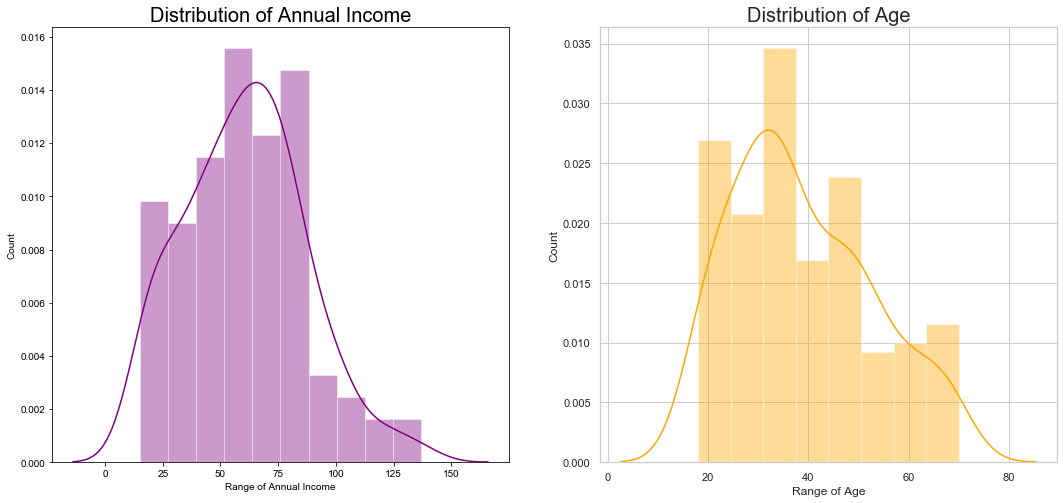

In [10]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (18, 8)

plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(df['annual_income_ks'], color = 'purple')
plt.title('Distribution of Annual Income', fontsize = 20)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(df['age'], color = 'orange')
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.show()

we can see that there are few people who earn more than 100K US Dollars. Most of the people have an earning of around 50K-75K US Dollars. Also, we can say that the least Income is around 20K US Dollars.

The most regular customers for the Mall has age around 30-35 years of age. Whereas the the age over 50 customers are the least frequent visitor in the Mall. Youngsters are lesser in number as compared to the Middle aged people.

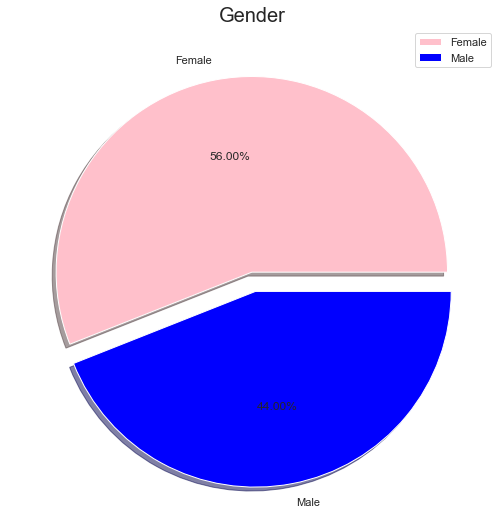

In [11]:
labels = ['Female', 'Male']
size = df['gender'].value_counts()
colors = ['pink', 'blue']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

The Females are in the lead with a share of 56% whereas the Males have a share of 44%.

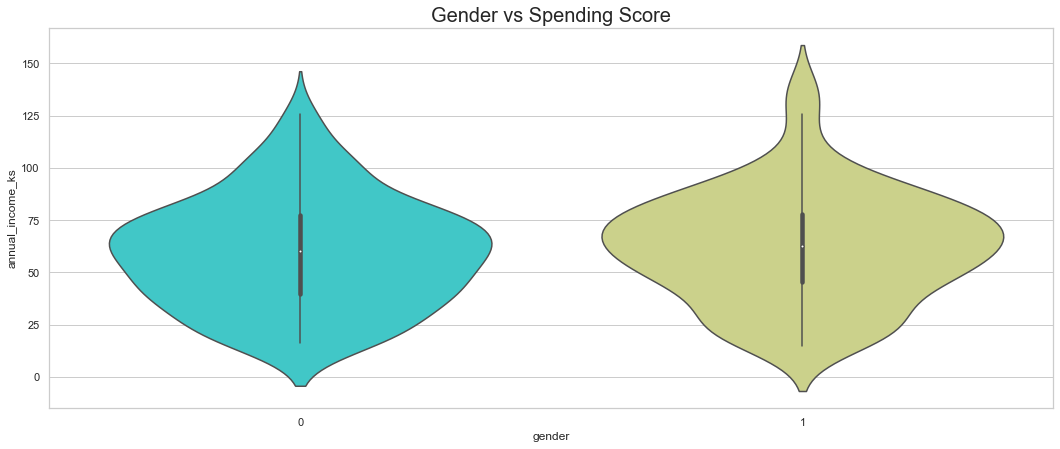

In [12]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.violinplot(df['gender'], df['annual_income_ks'], palette = 'rainbow')
plt.title('Gender vs Spending Score', fontsize = 20)
plt.show()

There are more number of males who get paid more than females. But, The number of males and females are equal in number when it comes to low annual income. 

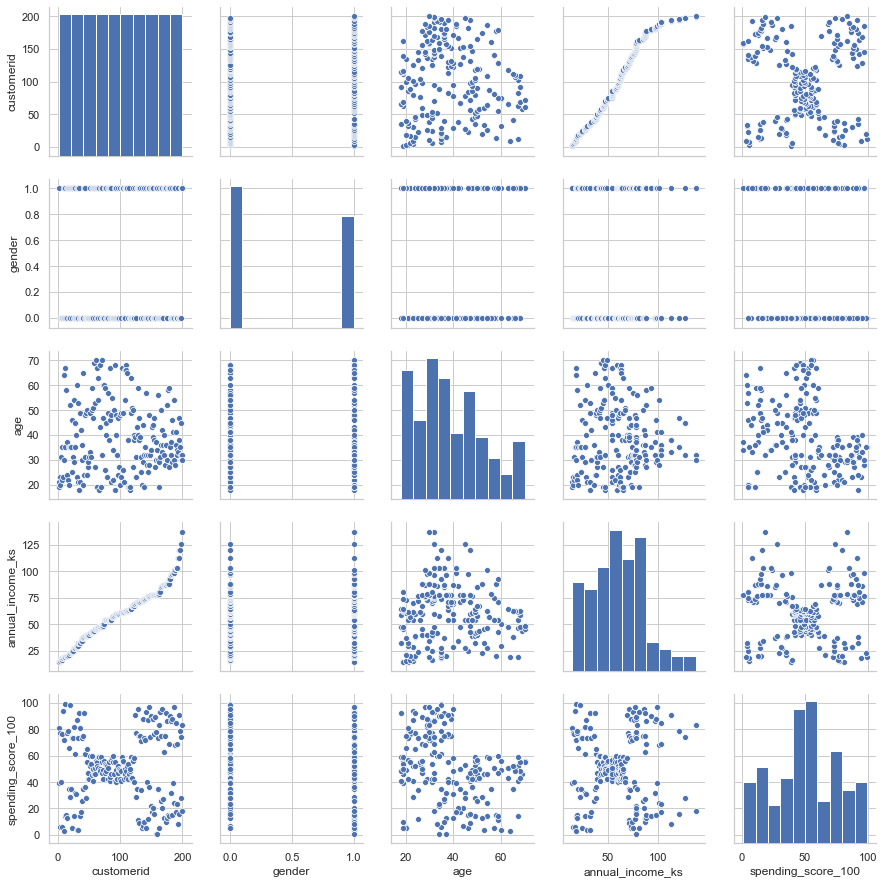

In [13]:
sns.pairplot(df)
plt.show()

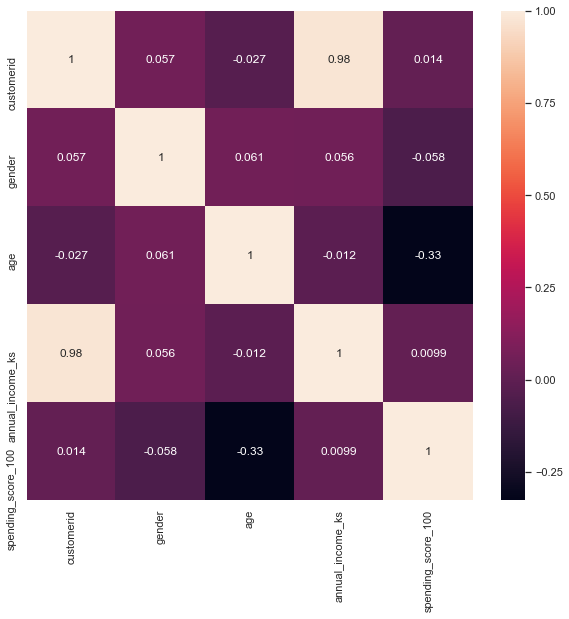

In [14]:
plt.figure(figsize=(10,9))
corr = df.corr()
sns.heatmap(corr,  annot = True)
plt.show()

according to the heat map, attributes do not have good correlation among them. Therefore, we will proceed with all of the features.

## PCA

We'll create a 2-feature PCA for graphing.

In [15]:
X = df.copy()
# Normalize
Xn = normalize(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(Xn)

Next, we'll separate the data into four equal sets for cross validation.

In [16]:
# Divide into two sets.
Xhalf1, Xhalf2, X_pca_1, X_pca_2 = train_test_split(Xn, X_pca, test_size=0.5, random_state=42)

# Dividing into four sets
X1, X2, X_pca1, X_pca2 = train_test_split(Xhalf1, X_pca_1, test_size=0.5, random_state=42)
X3, X4, X_pca3, X_pca4 = train_test_split(Xhalf2, X_pca_1, test_size=0.5, random_state=42)

# Checking the length of each set
print(len(X1), len(X_pca1))
print(len(X2), len(X_pca2))
print(len(X3), len(X_pca3))
print(len(X4), len(X_pca4))

50 50
50 50
50 50
50 50


In [17]:
# Ensuring all sets are the same length
X2 = X2[:50][:]
X4 = X4[:50][:]

X_pca2 = X_pca2[:50][:]
X_pca4 = X_pca4[:50][:]

print(len(X2), len(X_pca2))
print(len(X4), len(X_pca4))

50 50
50 50


## Exploring Clusters

### K Means Modeling

We create two data frames, one for the y predictions from a kmeans model, and another silhouette scores for the different clusters. Later we fit the model for 2 to 5 clusters, calculating silhouette scores for each.

In [18]:
# Initialize data frames
ypred = pd.DataFrame()
score = pd.DataFrame(columns=['cluster_pred','sil_score'])

# Keep track of counts of the models and use data from the different folds
for counter, data in enumerate([
    (X1, X_pca1),
    (X2, X_pca2),
    (X3, X_pca3),
    (X4, X_pca4)]):
    
    # Put the features into ypred.
    ypred['pca_f1' + '_sample' + str(counter)] = data[1][:, 0]
    ypred['pca_f2' + '_sample' + str(counter)] = data[1][:, 1]
    
    # Creating a list of possible number of clusters to test in kmeans.
    for nclust in range(2, 6):
       
        # Instantiating and fit_predicting model to then add to data frame
        kmeans = KMeans(n_clusters=nclust, random_state=42)
        pred = kmeans.fit_predict(data[0])
        ypred['clust' + str(nclust) + '_sample' + str(counter)] = pred
        
        # Calculating silhouette scores for the data and adding that to the shilouette score
        labels = kmeans.labels_
        sscore = metrics.silhouette_score(data[0], labels, metric='euclidean')
        score = score.append({'cluster_pred':'clust' + str(nclust) + '_sample' + str(counter), 
                              'silhouette_score':sscore}, ignore_index=True)

In [19]:
# Sorting sihoilette scores
score.sort_values(by='silhouette_score', ascending=False)

,cluster_pred,sil_score,silhouette_score
9,clust3_sample2,NaN,0.613884
8,clust2_sample2,NaN,0.544077
3,clust5_sample0,NaN,0.520151
1,clust3_sample0,NaN,0.500564
7,clust5_sample1,NaN,0.490461
11,clust5_sample2,NaN,0.487077
15,clust5_sample3,NaN,0.482059
10,clust4_sample2,NaN,0.474064
6,clust4_sample1,NaN,0.470493
2,clust4_sample0,NaN,0.468968


A three-cluster system has the highest silhouette scores.

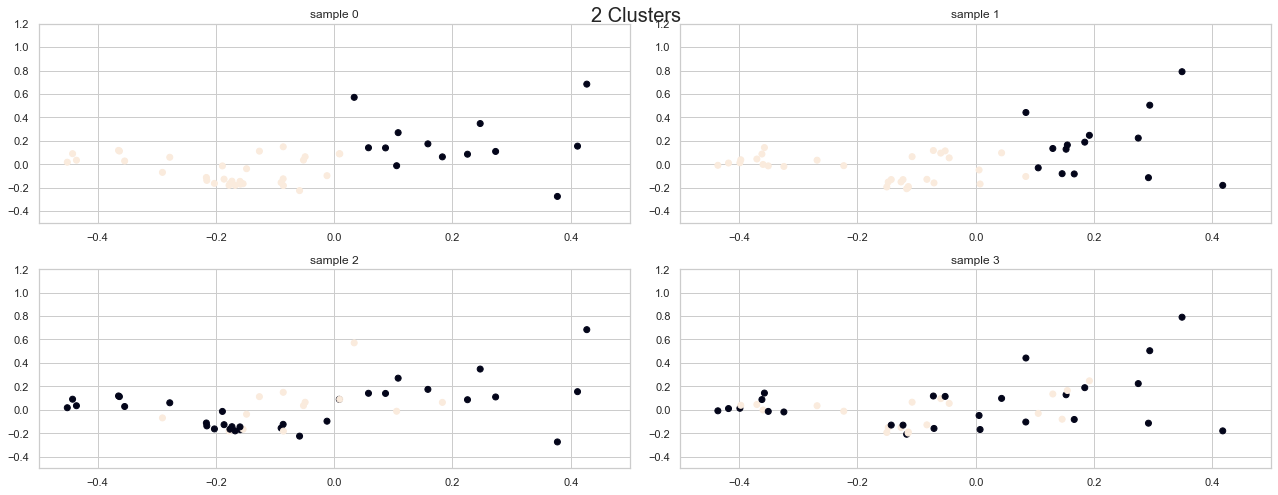

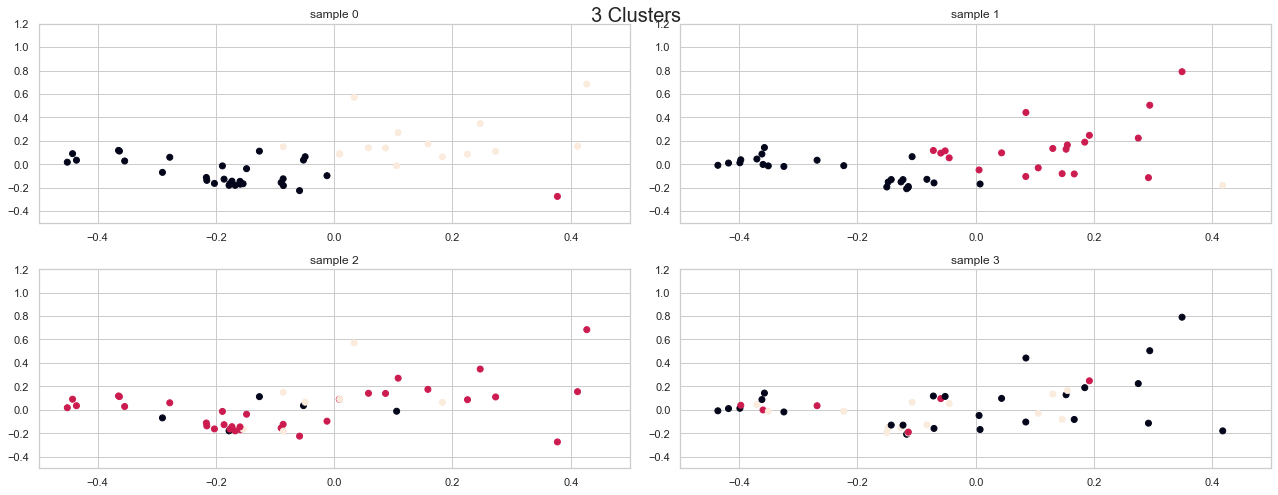

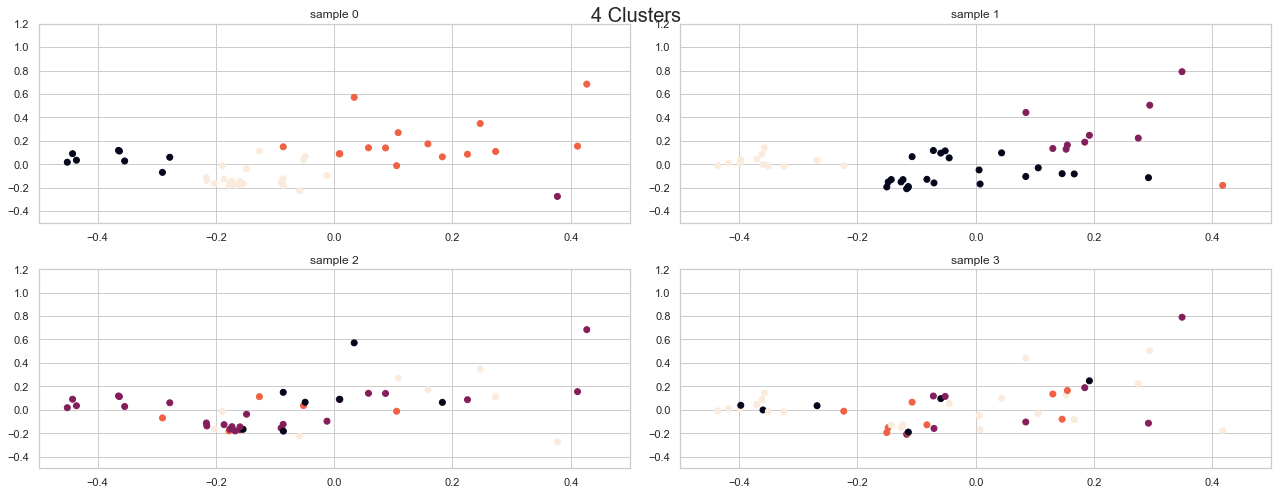

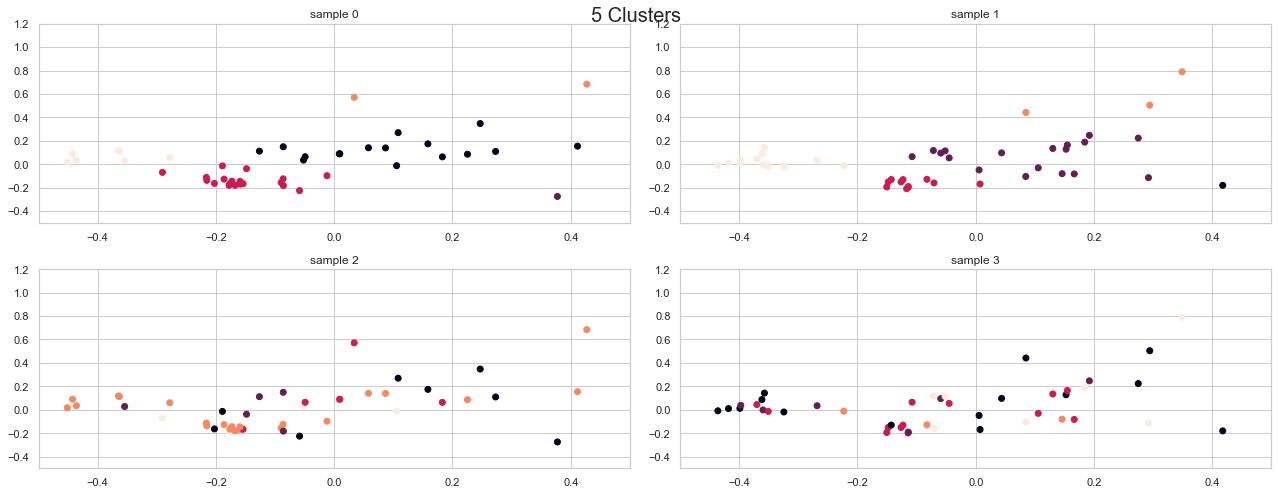

In [20]:
# For each  number of clusters, plot the clusters using the
# pca features for each sample.
for cluster in range(2, 6):
    
    # Make a grid of subplots.
    f, axarr = plt.subplots(2, 2)
    
    # Make a plot for each sample.
    for i in range(4):
        
        # PCA-created features.
        x_sub = ypred['pca_f1_sample{}'.format(i)]
        y_sub = ypred['pca_f2_sample{}'.format(i)]
        
        # Cluster assignments.
        c = ypred['clust{}_sample{}'.format(cluster, i)]
        
        # Assign the subplot to its place on the grid.
        rows = int(np.floor(i / 2))
        cols = i % 2
        axarr[rows, cols].scatter(x_sub, y_sub, c=c)
        axarr[rows, cols].set_title('sample {}'.format(i))
        axarr[rows, cols].set_xlim([-.5, .5])
        axarr[rows, cols].set_ylim([-.5, 1.2])
    
    # Space out the plots so that the headings don't overlap axis values.
    plt.suptitle('{} Clusters'.format(cluster), fontsize=20)
    plt.tight_layout()
    plt.show()
    print('\n')

Watching the latter plots of the 2-feature PCA data, the 5-cluster solution is consistent across samples 0 and 1, but inconsistent across samples 2 and 3.

Mean-shift

In [21]:
# Initialize new data frames
ypred_ms = pd.DataFrame()
score_ms = pd.DataFrame(columns=['cluster_pred','mean_shift', 'quantile'])

# Keep track of counts of the models and use data from the different folds
for counter, data in enumerate([X1, X2, X3, X4]):
    # Creating a list of possible quantiles to test in mean shift.
    for n in [0.1, 0.2, 0.3, 0.4]:
        # Estimating number of clusters for data
        bandwidth = estimate_bandwidth(data, quantile=n, n_samples=500)
        # Ensuring all sets are the same lenght
        data = data[:500][:]
        # Instantiating and fit_predicting model to then add to data frame
        ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
        pred = ms.fit_predict(data)
        labels = ms.labels_
        cntrs = len(np.unique(labels))
        ypred_ms['clust' + str(cntrs) + '_sample' + str(counter)] = pred
        # Calculating silhouette scores for the data and adding that to the shilouette score
        sscore = metrics.silhouette_score(data, labels, metric='euclidean')
        score_ms = score_ms.append({'cluster_pred':'clust' + str(cntrs) + '_sample' + str(counter), 
                              'silhouette_score':sscore, 'quantile':n}, ignore_index=True)

In [22]:
score_ms.sort_values(by='silhouette_score', ascending=False)

,cluster_pred,mean_shift,quantile,silhouette_score
10,clust3_sample2,NaN,0.3,0.611677
11,clust3_sample2,NaN,0.4,0.590821
9,clust4_sample2,NaN,0.2,0.537041
3,clust3_sample0,NaN,0.4,0.532879
4,clust13_sample1,NaN,0.1,0.524231
7,clust2_sample1,NaN,0.4,0.507156
6,clust3_sample1,NaN,0.3,0.492594
1,clust5_sample0,NaN,0.2,0.453271
12,clust9_sample3,NaN,0.1,0.447152
5,clust5_sample1,NaN,0.2,0.416729


The quantile of 0.3 calculated a high Silhouette score for sample 2 and generated 3 clusters.

Spectral Clustering

In [23]:
# Initialize data frames
ypred_sc = pd.DataFrame()
score_sc = pd.DataFrame(columns=['cluster_pred','silhouette_score'])

# Keep track of counts of the models and use data from the different folds
for counter, data in enumerate([
    (X1, X_pca1),
    (X2, X_pca2),
    (X3, X_pca3),
    (X4, X_pca4)]):
    
    # Put the features into ypred.
    ypred_sc['pca_f1' + '_sample' + str(counter)] = data[1][:, 0]
    ypred_sc['pca_f2' + '_sample' + str(counter)] = data[1][:, 1]
    
    # Creating a list of possible number of clusters to test in kmeans.
    for nclust in range(2, 6):
        # Instantiating and fit_predicting model to then add to data frame
        sc = SpectralClustering(n_clusters=nclust)
        pred = sc.fit_predict(data[0])
        ypred_sc['clust' + str(nclust) + '_sample' + str(counter)] = pred
        # Calculating silhouette scores for the data and adding that to the shilouette score
        labels = sc.labels_
        sscore_sc = metrics.silhouette_score(data[0], labels, metric='euclidean')
        score_sc = score_sc.append({'cluster_pred':'clust' + str(nclust) + '_sample' + str(counter), 
                              'silhouette_score':sscore_sc}, ignore_index=True)

In [24]:
score_sc.sort_values(by='silhouette_score', ascending=False)

,cluster_pred,silhouette_score
9,clust3_sample2,0.611677
8,clust2_sample2,0.555953
0,clust2_sample0,0.555067
1,clust3_sample0,0.491680
4,clust2_sample1,0.487795
13,clust3_sample3,0.473368
5,clust3_sample1,0.471182
7,clust5_sample1,0.469143
15,clust5_sample3,0.465539
11,clust5_sample2,0.464674


A 3 cluster configuration generates the highest silhouette score.

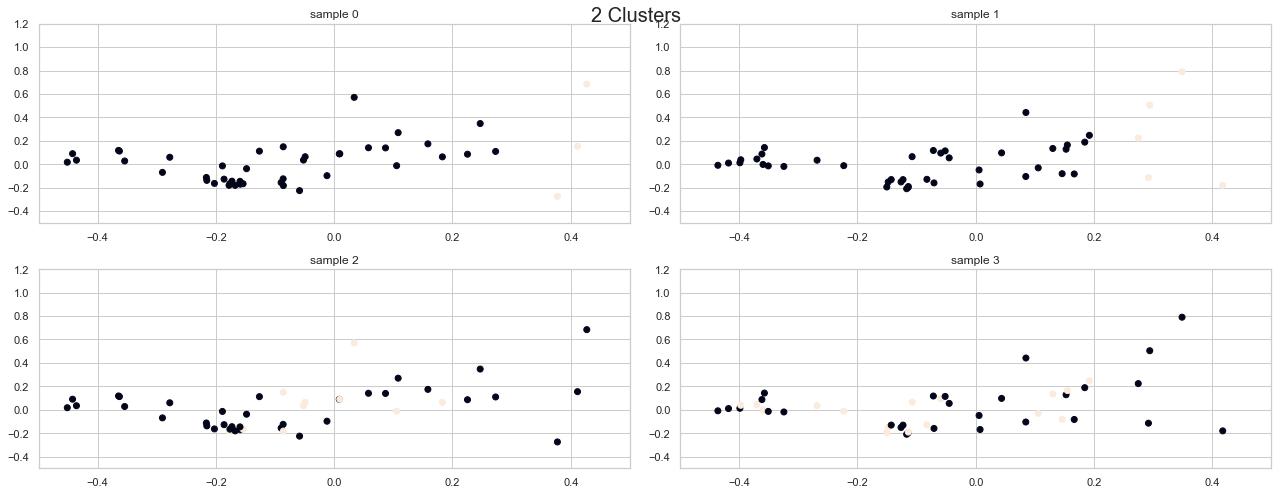

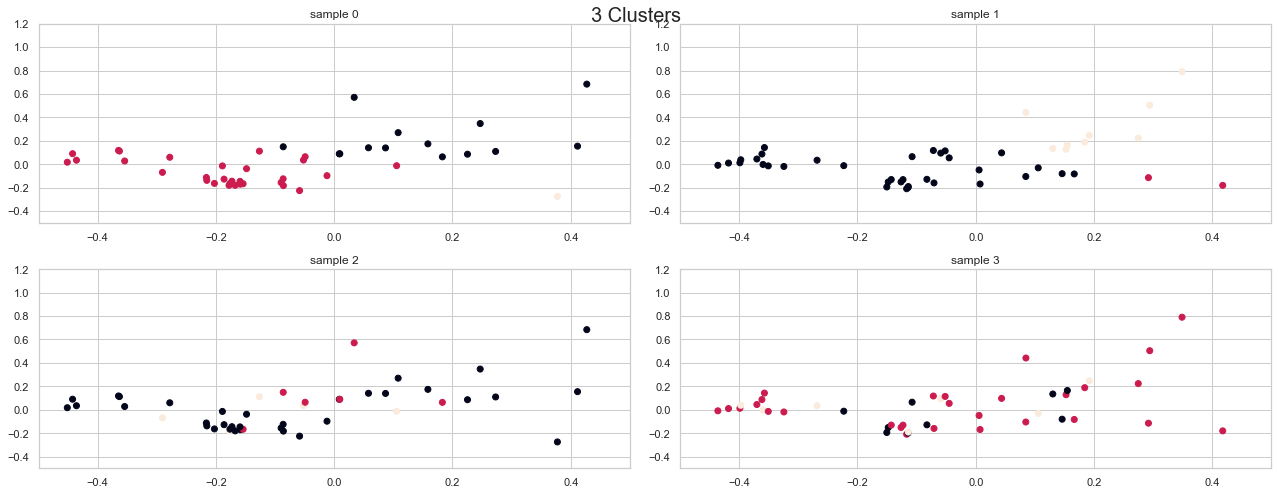

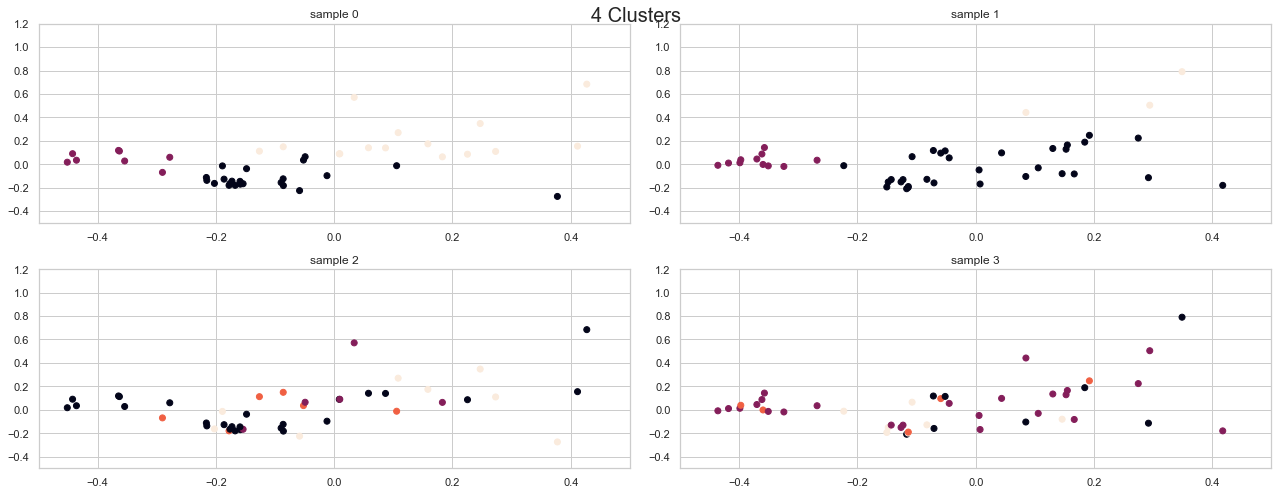

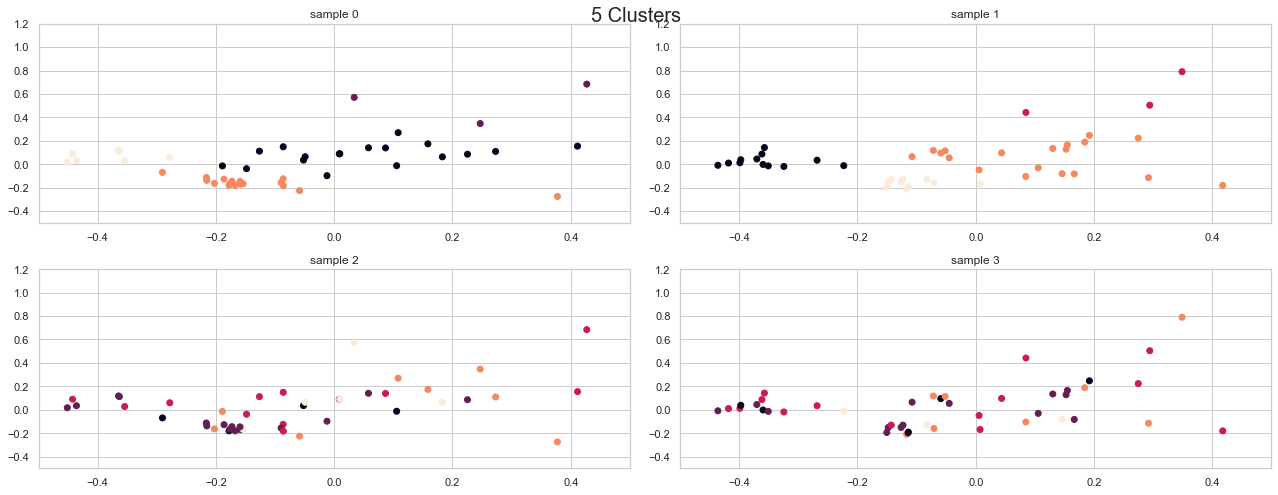

In [25]:
# For each  number of clusters, plot the clusters using the
# pca features for each sample.
for cluster in range(2, 6):
    
    # Make a grid of subplots.
    f, axarr = plt.subplots(2, 2)
    
    # Make a plot for each sample.
    for i in range(4):
        
        # PCA-created features.
        x_sub = ypred_sc['pca_f1_sample{}'.format(i)]
        y_sub = ypred_sc['pca_f2_sample{}'.format(i)]
        
        # Cluster assignments.
        c = ypred_sc['clust{}_sample{}'.format(cluster, i)]
        
        # Assign the subplot to its place on the grid.
        rows = int(np.floor(i / 2))
        cols = i % 2
        axarr[rows, cols].scatter(x_sub, y_sub, c=c)
        axarr[rows, cols].set_title('sample {}'.format(i))
        axarr[rows, cols].set_xlim([-.5, .5])
        axarr[rows, cols].set_ylim([-.5, 1.2])
    
    # Space out the plots so that the headings don't overlap axis values.
    plt.suptitle('{} Clusters'.format(cluster), fontsize=20)
    plt.tight_layout()
    plt.show()
    print('\n')

Watching the latter plots of the 2-feature PCA data, the 2 and 3 cluster configuration show a consistent solution across samples 0 and 1, but inconsistent across samples 2 and 3. The 4 and 5 cluster configuration show overfitting for all samples.

Affinity Propagation

In [26]:
# Initialize data frames
ypred = pd.DataFrame()
score_af = pd.DataFrame(columns=['cluster_pred','AF'])

# Keep track of counts of the models and use data from the different folds
for counter, data in enumerate([X1, X2, X3, X4]):
    # Ensuring all sets are the same lenght
    data = data[:50][:]
    # Instantiating and fit_predicting model to then add to data frame
    af = AffinityPropagation().fit(data)
    cluster_centers_indices = af.cluster_centers_indices_
    n_clusters_ = len(cluster_centers_indices)
    #pred = af.fit_predict(data)
    #ypred['clust' + str(nclust) + '_sample' + str(counter)] = pred
    # Calculating silhouette scores for the data and adding that to the shilouette score
    labels = af.labels_
    sscore_af = metrics.silhouette_score(data, labels, metric='euclidean')
    score_af = score_af.append({'cluster_pred':'clust' + str(n_clusters_) + '_sample' + str(counter), 
                              'AF':sscore_af}, ignore_index=True)

In [27]:
score_af.sort_values(by='AF', ascending=False)

,cluster_pred,AF
1,clust8_sample1,0.530485
0,clust7_sample0,0.486732
2,clust7_sample2,0.472095
3,clust6_sample3,0.446129


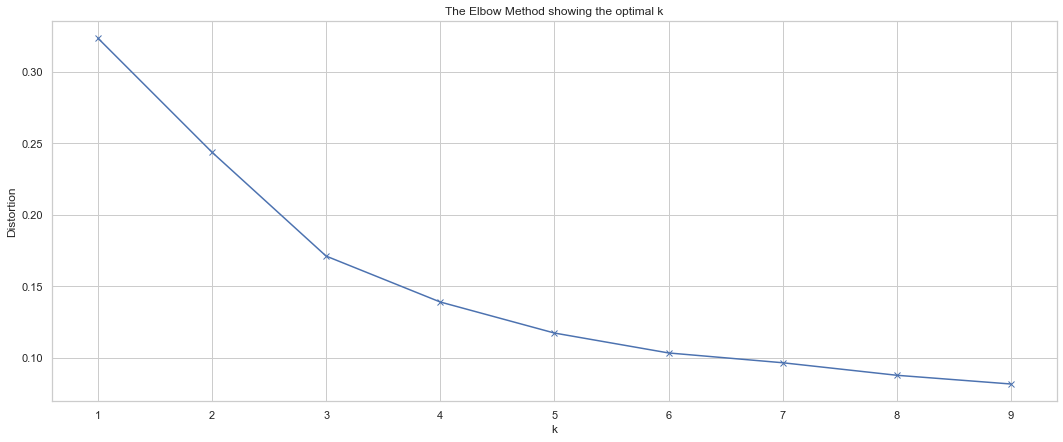

In [28]:
# Use the elbow method to see what is the optimal amount of clusters.

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X1)
    kmeanModel.fit(X1)
    distortions.append(sum(np.min(cdist(X1, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X1.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

3 clusters are the optimal amount of clusters because the distortion from the 3rd to 4th cluster is 0.03

In [29]:
cluster_pred = KMeans(n_clusters=3, random_state=42).fit_predict(X)
X_pred = X.copy()

X_pred['cluster_assignment'] = cluster_pred

cluster_dataframes = {}
for n_clust in range(3):
    cluster_dataframes[n_clust] = X_pred.loc[X_pred['cluster_assignment'] == n_clust]

for name, frame in cluster_dataframes.items():
    print(name)
    print('\n')
    print(frame.describe())

0


       customerid     gender        age  annual_income_ks  spending_score_100  \
count   71.000000  71.000000  71.000000         71.000000           71.000000   
mean    96.985915   0.464789  43.197183         59.352113           50.591549   
std     20.664319   0.502309  16.439169          7.335040           12.934536   
min     61.000000   0.000000  18.000000         46.000000            9.000000   
25%     79.500000   0.000000  27.000000         54.000000           43.500000   
50%     97.000000   0.000000  45.000000         60.000000           50.000000   
75%    114.500000   1.000000  56.000000         64.500000           56.000000   
max    132.000000   1.000000  70.000000         71.000000           95.000000   

       cluster_assignment  
count                71.0  
mean                  0.0  
std                   0.0  
min                   0.0  
25%                   0.0  
50%                   0.0  
75%                   0.0  
max                   0.0  
1


       cus

## Cluster Analysis

#### Cluster 0

There are slightly more female customers in cluster 0, consisting of 54% female.The average annual income is around 59 K$ having average age of 43 years old. The spending score is 50 for this cluster.

#### Cluster 1

There are slightly more female customers in cluster 1 too, whic is around 55%. This cluster has high annual income (88 K$), which is way higher than cluster 0 annual income. The average age of the custermers around 36 years of old. This cluster also have the spending score as 50.

#### Cluster 2

Majority of this cluster consist of females than previous two clusters which is around 61%. The average age is 36 and the average annual income is around 30 K$, which is lower than the other two clusters. Spending score is 49 and it is little less than the other two clusters.

In [30]:
# run k-means on the full dataset
n_clusters = 3
km_model = KMeans(n_clusters = n_clusters, random_state = 42)
km_model.fit(X_pred)
# add labels to data for analysis
X_label = X_pred.copy()
X_label['label'] = km_model.labels_

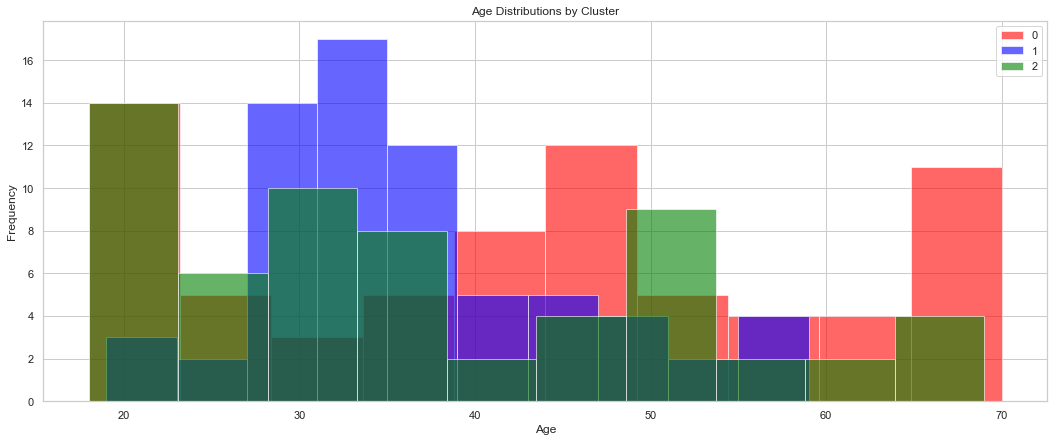

In [31]:
# look at age histograms by cluster
fig,ax = plt.subplots()
colors = {0:'red', 1:'blue', 2:'green'}
grouped = X_label.groupby('label')
for key,group in grouped:
    group['age'].plot(ax=ax, kind='hist', label=key, color=colors[key], alpha = 0.6)
plt.legend()
plt.xlabel('Age')
plt.title('Age Distributions by Cluster')
plt.show()

Majority of the clusters overlap in age. However, we can see that distribution of cluster 1 mainly consists younger customers aged from 25 to 40 year olds

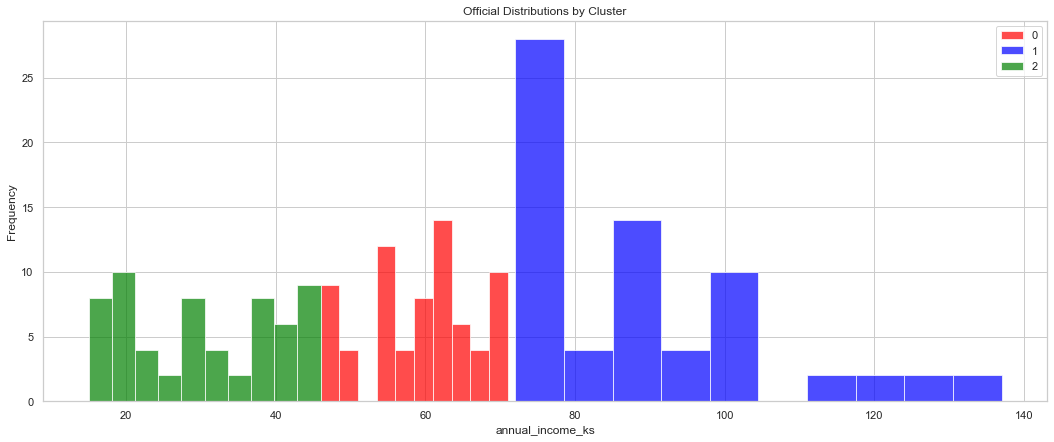

In [32]:
# look at annual_income_ks histograms by cluster
fig,ax = plt.subplots()
for key,group in grouped:
    group['annual_income_ks'].plot(ax=ax, kind='hist', label=key, color=colors[key], alpha = 0.7)
plt.legend()
plt.xlabel('annual_income_ks')
plt.title('Official Distributions by Cluster')
plt.show()

With the distribution of annual income, we can see that the youngest group, cluster 1 has highest annual income, followed by cluster 0 and cluster 2. 

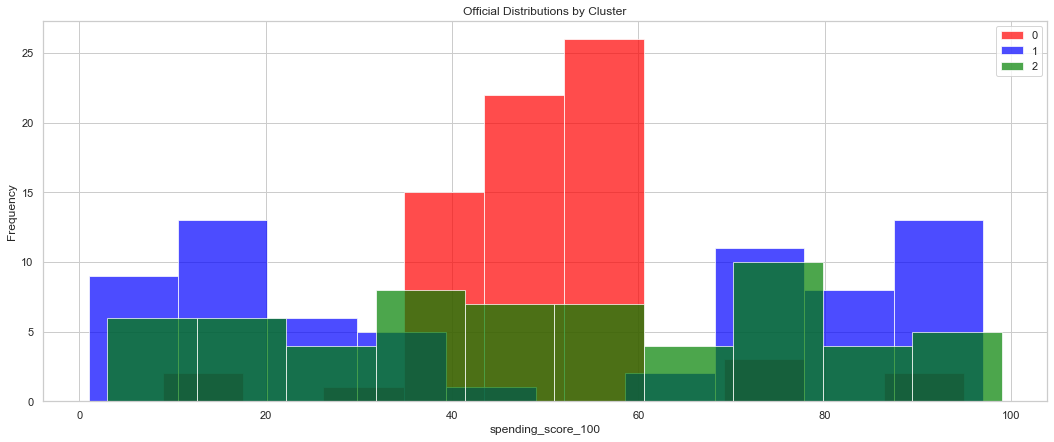

In [34]:
# look at spending score histograms by cluster
fig,ax = plt.subplots()
for key,group in grouped:
    group['spending_score_100'].plot(ax=ax, kind='hist', label=key, color=colors[key], alpha = 0.7)
plt.legend()
plt.xlabel('spending_score_100')
plt.title('Official Distributions by Cluster')
plt.show()

Wth distibution of spending score, we can see that the cluster 1 has heighest spending scores than other two clusters. 

### Conclusion

Shopping mall owner should focus on his marketing stratergy for the customers with the age group from 25 to 40, as their annual income is greater than any other age groups as well as their spending score is also higer than other groups.